# Gene Expression Classification
This notebook preprocesses gene expression data, trains models, evaluates them, and visualizes results.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install dependencies (if needed)
!pip install scikit-learn pandas matplotlib seaborn

In [19]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Preprocess the data

In [20]:
# Load dataset
count_data = pd.read_csv("/content/drive/MyDrive/raw_counts.txt", sep="\t", index_col=0)

# Define feature matrix (X) and labels (y)
X = count_data.T.values  # Transpose to match samples x features format
y = np.array([0, 0, 1, 1, 2, 2, 3, 3])  # Modify based on actual sample labels

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save preprocessed data
pd.DataFrame(X_scaled, index=count_data.columns).to_csv("/content/drive/MyDrive/processed_data.csv", index=False)

count_data.head()

,KO-DMSO_Rep1,KO-DMSO_Rep2,KO-E20_Rep1,KO-E20_Rep2,WT-DMSO_Rep1,WT-DMSO_Rep2,WT-E20_Rep1,WT-E20_Rep2
ENSG00000000003.15,197.000,196.000,212.000,284.000,300.000,150.002,405.000,456.000
ENSG00000000005.6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000000419.14,115.000,95.000,121.000,232.001,202.001,99.000,368.377,316.001
ENSG00000000457.14,18.112,14.093,15.168,20.659,19.581,19.008,54.454,35.898
ENSG00000000460.17,54.888,35.907,41.833,56.341,125.419,44.992,126.546,139.101


# Train the models

In [21]:
# Load preprocessed dataset
df = pd.read_csv("/content/drive/MyDrive/processed_data.csv", index_col=0)
X = df.values
y = np.array([0, 0, 1, 1, 2, 2, 3, 3])  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42, stratify=y)

# Train models
logistic_model = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Save models
joblib.dump(logistic_model, "/content/drive/MyDrive/logistic_model.pkl")
joblib.dump(random_forest_model, "/content/drive/MyDrive/random_forest_model.pkl")
print("Training complete. Models saved in results/")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete. Models saved in results/


In [22]:
# Load models
logistic_model = joblib.load("/content/drive/MyDrive/logistic_model.pkl")
random_forest_model = joblib.load("/content/drive/MyDrive/random_forest_model.pkl")

# Predictions
logistic_preds = logistic_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)

# Function to save evaluation results
def save_results(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    with open(f"/content/drive/MyDrive/{name}_report.txt", "w") as f:
        f.write(f"{name} Model Evaluation\n")
        f.write(f"Accuracy: {accuracy:.2f}\n")
        f.write("Confusion Matrix:\n")
        f.write(np.array2string(conf_matrix) + "\n")
        f.write("Classification Report:\n")
        f.write(class_report + "\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"],
                yticklabels=["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"/content/drive/MyDrive/{name}_confusion_matrix.png")
    plt.close()

# Evaluate and save results
save_results("Logistic_Regression", y_test, logistic_preds)
save_results("Random_Forest", y_test, rf_preds)
print("Evaluation complete. Reports saved in results/")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Evaluation complete. Reports saved in results/


In [23]:
# Predictions
logistic_preds = logistic_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)

# Function to save evaluation results
def save_results(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    # Save report as a text file
    with open(f"/content/drive/MyDrive/{name}_report.txt", "w") as f:
        f.write(f"{name} Model Evaluation\n")
        f.write(f"Accuracy: {accuracy:.2f}\n")
        f.write("Confusion Matrix:\n")
        f.write(np.array2string(conf_matrix) + "\n")
        f.write("Classification Report:\n")
        f.write(class_report + "\n")

    # Plot and save confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"], yticklabels=["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"/content/drive/MyDrive/{name}_confusion_matrix.png")
    plt.close()

# Evaluate and save results
save_results("Logistic_Regression", y_test, logistic_preds)
save_results("Random_Forest", y_test, rf_preds)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [24]:
# Train Logistic Regression
logistic_model.fit(X_scaled, y)

# Cross-validation
log_scores = cross_val_score(logistic_model, X_scaled, y, cv=2)
print('Logistic Regression Cross-Validation Accuracy:', log_scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Cross-Validation Accuracy: 0.75


In [26]:
# Train Random Forest Model
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred = random_forest_model.predict(X_test)

# Evaluation
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Random Forest Accuracy: 0.75
Confusion Matrix:
 [[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.62      0.75      0.67         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


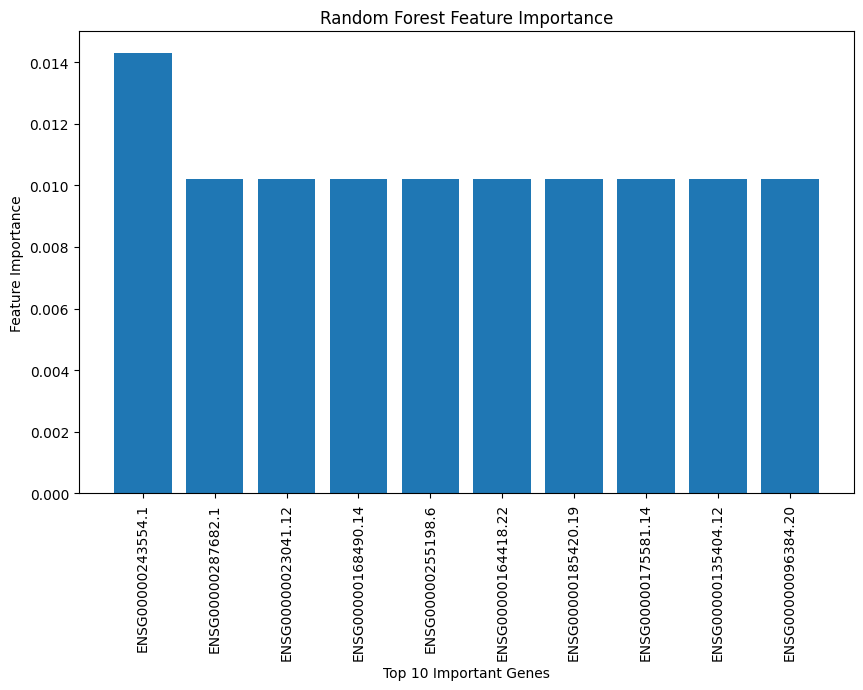

In [27]:
# Feature Importance (Random Forest)
feature_importances = random_forest_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[sorted_idx[:10]], tick_label=[count_data.index[i] for i in sorted_idx[:10]])
plt.xticks(rotation=90)
plt.xlabel("Top 10 Important Genes")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.savefig("/content/drive/MyDrive/feature_importance.png")
plt.show()


# Visualization: Confusion Matrix

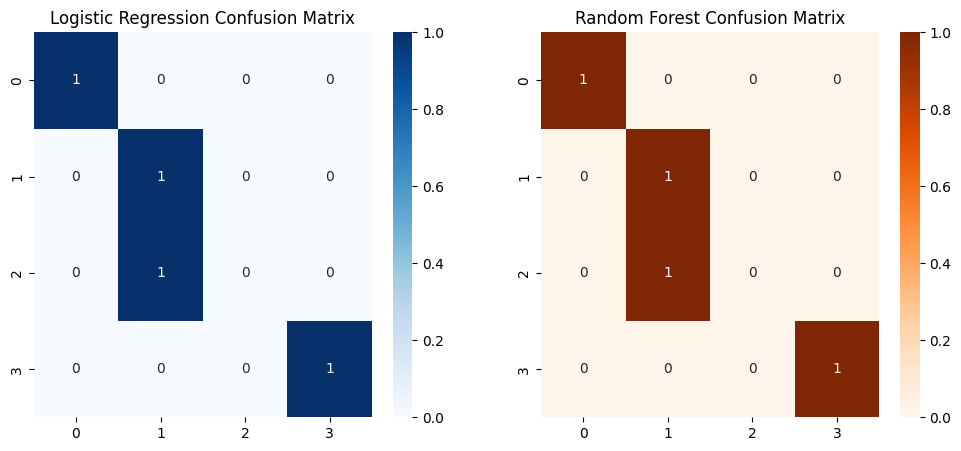

In [28]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
plt.savefig("/content/drive/MyDrive/confusion_matrices.png")
plt.show()


# PCA Visualization

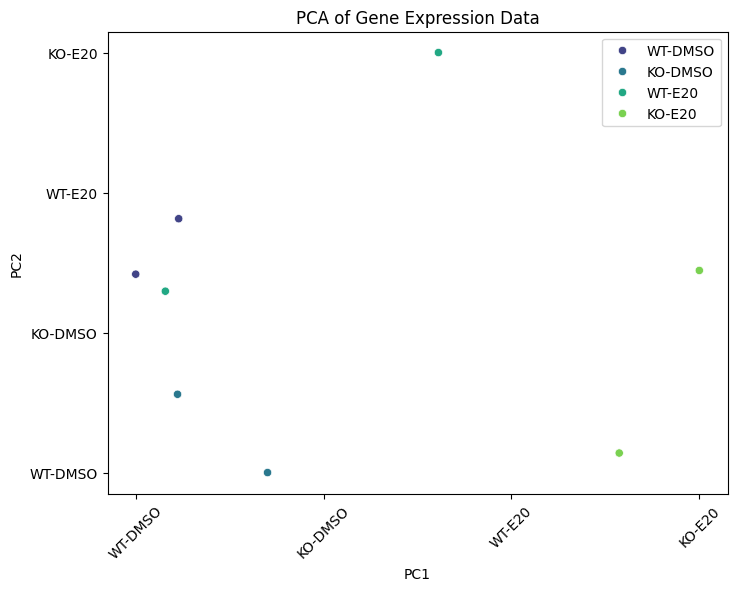

In [29]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define labels for the groups
group_labels = ["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"]

# Scatter plot with tick labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[group_labels[i] for i in y], palette='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Gene Expression Data")

# Add tick labels manually
plt.xticks(np.linspace(min(X_pca[:, 0]), max(X_pca[:, 0]), len(group_labels)), group_labels, rotation=45)
plt.yticks(np.linspace(min(X_pca[:, 1]), max(X_pca[:, 1]), len(group_labels)), group_labels)

# Save & Show
plt.savefig("/content/drive/MyDrive/pca_plot.png")
plt.show()

## **Deploy as a Streamlit app to visualize predictions dynamically:**

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Streamlit app title
st.title("Gene Expression Analysis App")

# File uploader
uploaded_file = st.file_uploader("Upload Gene Expression Data (CSV or TXT)", type=["csv", "txt"])

if uploaded_file is not None:
    # Load dataset
    count_data = pd.read_csv(uploaded_file, sep="\t", index_col=0)
    st.write("### Preview of Data:")
    st.write(count_data.head())

    # Transpose and scale the data
    X = count_data.T.values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Define sample labels (Modify as needed)
    labels = ["WT-DMSO", "KO-DMSO", "WT-E20", "KO-E20"] * (X.shape[0] // 4)

    # PCA Plot
    fig, ax = plt.subplots()
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', ax=ax)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA of Gene Expression Data")
    st.pyplot(fig)

    # Model training
    y = np.array([0, 0, 1, 1, 2, 2, 3, 3])  # Modify labels accordingly
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42, stratify=y)

    # Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    y_pred_log = log_model.predict(X_test)

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Model Results
    st.write("## Model Evaluation")
    st.write("### Logistic Regression")
    st.write("Accuracy:", accuracy_score(y_test, y_pred_log))
    st.write("Confusion Matrix:")
    st.write(confusion_matrix(y_test, y_pred_log))
    st.write("Classification Report:")
    st.text(classification_report(y_test, y_pred_log))

    st.write("### Random Forest")
    st.write("Accuracy:", accuracy_score(y_test, y_pred_rf))
    st.write("Confusion Matrix:")
    st.write(confusion_matrix(y_test, y_pred_rf))
    st.write("Classification Report:")
    st.text(classification_report(y_test, y_pred_rf))
